#### Data analysis notebook

Reads in the data files and plot results

  * Instantiate analyzer class object **Geant4Analyzer(root_filename, label)**
  * Then apply cuts to the data
  * Plotting with the built-in function **plot_histogram()**
  * For user defined plots, just access the data elements directly: **Geant4Analyzer.data[element_name]**. Get the data element names from **Geant4Analyzer.data.keys()**

Data loaded from /data/xenon/acolijn/G4FastSim/standard/standard_test.root
Data loaded from /data/xenon/acolijn/G4FastSim/fast/fast_test.root


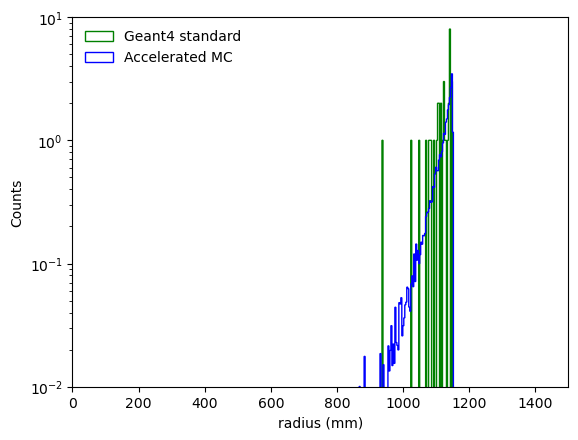

In [8]:
from analyzer import Geant4Analyzer
import matplotlib.pyplot as plt
import numpy as np

# define the cuts to apply to the data

# cut on teh global event variables
cut = lambda data: (data['ncomp'] + data['nphot'] == 1) & (data['type'] == 0) & (data['e'] < 300.) 
# additional cuts on the clusters
cut_hit = lambda data: (data['r'] < 1150.) & (np.abs(data['zh']) < 1100.)

std = Geant4Analyzer("/data/xenon/acolijn/G4FastSim/standard/standard_test.root", label="Geant4 standard")
std.preprocess_data(cut=cut, cut_hit=cut_hit)

fast = Geant4Analyzer("/data/xenon/acolijn/G4FastSim/fast/fast_test.root", label="Accelerated MC")
fast.preprocess_data(cut=cut, cut_hit=cut_hit)

nbin = 1000
ax = std.plot_histogram('r', bins=nbin, range=(-1500,1500), show=False)
ax = fast.plot_histogram('r', bins=nbin, ax=ax, range=(-1500,1500), show=False)

plt.yscale('log')
plt.ylim(1e-2, 1e1)
plt.xlim(0, 1500)

plt.legend(frameon=False)
plt.show()


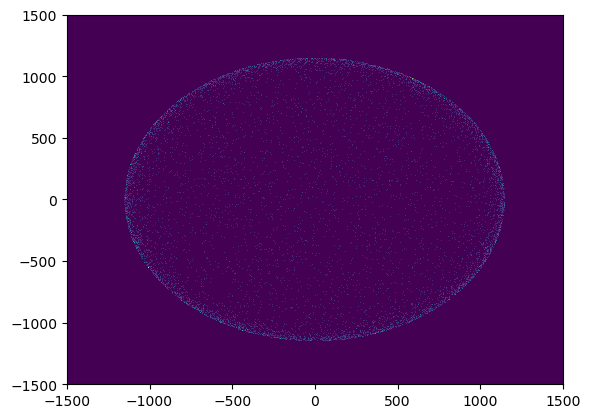

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
bins = 1000
h = plt.hist2d(fast.data['xh'], fast.data['yh'], bins=bins, range=((-1500, 1500), (-1500, 1500)))
#h = plt.hist2d(std.data['xh'], std.data['yh'], bins=bins, range=((-1500, 1500), (-1500, 1500)))
#plt.scatter(std.data['xp'], std.data['yp'], s=0.01, c='w')

In [64]:
fast.data['nclus'].size

42437

In [77]:
import matplotlib
matplotlib.get_configdir()

'/user/z37/.config/matplotlib'